In [1]:
import sys, os
from matplotlib import pyplot as plt
import seaborn as sns
import json

In [10]:
# file_path = '/Users/user/Desktop/chords_recogn/CE200_sample/CE200_sample/14/ground_truth.txt'
file_path = 'CE200_sample/CE200_sample/14/ground_truth.txt'
with open(file_path, 'r') as f:
    chords = []
    for line in f:
        chords.append(line.split())

In [84]:
chords # 這條歌曲的真實和弦
print(chords)
print(len(chords)) # 這首歌總共的和弦數(包括 null chord)

[['0.000000', '0.690180', 'N'], ['0.690180', '4.342384', 'D:maj'], ['4.342384', '8.886070', 'A:maj'], ['8.887888', '12.950465', 'B:min'], ['12.949339', '16.986102', 'G:maj'], ['16.982740', '21.069668', 'D:maj'], ['21.069668', '24.923174', 'G:maj'], ['24.928047', '29.179285', 'B:min'], ['29.181264', '32.975276', 'G:maj'], ['32.976736', '37.097186', 'D:maj'], ['37.116358', '41.123237', 'G:maj'], ['41.123237', '45.168460', 'B:min'], ['45.168460', '49.079481', 'A:maj'], ['49.079481', '51.092507', 'G:maj'], ['51.092507', '53.143876', 'A:maj'], ['53.140165', '55.156901', 'B:min'], ['55.156901', '57.131583', 'D:maj'], ['57.126364', '59.240467', 'G:maj'], ['59.243436', '61.272665', 'A:maj'], ['61.265144', '63.209004', 'B:min'], ['63.209004', '64.225102', 'G:maj'], ['64.221416', '65.241201', 'A:maj'], ['65.241201', '69.248080', 'D:maj'], ['69.248080', '73.293303', 'A:maj'], ['73.293303', '77.357698', 'B:min'], ['77.357698', '79.332380', 'G:maj'], ['79.332380', '81.364577', 'A:maj'], ['81.364577

In [11]:
file_path = 'CE200_sample/CE200_sample/14/feature.json'
with open(file_path, 'r') as f:
    d = f.read()
    js = json.loads(d)

In [79]:
# 印出有哪些 feature
## Librosa Document: https://librosa.org/doc/latest/feature.html
## Spectral Features: https://blog.csdn.net/qq7835144/article/details/88812119
print(js.keys())

dict_keys(['chroma_stft', 'chroma_cqt', 'chroma_cens', 'rms', 'spectral_centroid', 'spectral_bandwidth', 'spectral_contrast', 'spectral_flatness', 'spectral_rolloff', 'poly_features', 'tonnetz', 'zero_crossing_rate'])


In [22]:
# chroma_stft總共有12個維度(半音)：C,C#,D,D#,E,...,G,G#
# 每個半音都有bin=10186個長度，代表的是在每個 bin 中的能量大小([0,1])
# bin~=整首歌長 236.50175s / (hop_length=512/sr=22050)
chroma_stft = js['chroma_stft'] # feature: chroma_stft
print(len(chroma_stft)) 
print(len(chroma_stft[0]))
print(len(chroma_stft[1]))
print(len(chroma_stft[11]))

12
10186
10186
10186


In [24]:
chroma_stft[0]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.002021562308073044,
 0.970880389213562,
 0.6199561953544617,
 0.657059371471405,
 1.0,
 0.3643862307071686,
 0.16137047111988068,
 0.31443655490875244,
 0.32370761036872864,
 0.3846582770347595,
 0.5085471272468567,
 0.55179762840271,
 0.41507020592689514,
 0.46583864092826843,
 0.5420874953269958,
 0.5562424659729004,
 0.22776050865650177,
 0.07571692764759064,
 0.0715947076678276,
 0.07013868540525436,
 0.07060852646827698,
 0.10690870881080627,
 0.07873919606208801,
 0.05196991190314293,
 0.06874551624059677,
 0.05546467751264572,
 0.1252484917640686,
 0.11014626920223236,
 0.18121622502803802,
 0.10757549852132797,
 0.08770902454853058,
 0.0931999459862709,
 0.07370766252279282,
 0.035703789442777634,
 0.07265187054872513,
 0.14635387063026428,
 0.4220101833343506,
 0.5333898663520813,
 0.1325969398021698,
 0.2025950998

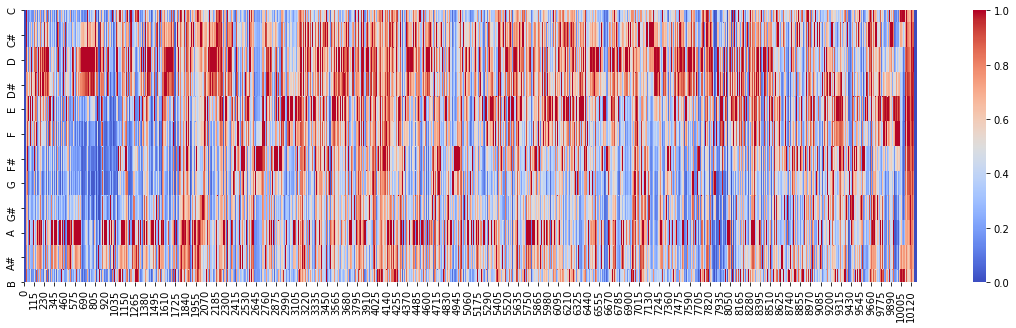

In [78]:
#### import numpy as np
import seaborn as sns # 用來畫 heatmap, 輸入要是 np.array
import matplotlib.pylab as plt

lst = [chroma_stft[i] for i in range(0, 12)]
chroma_lst = np.array(lst)

plt.figure(figsize = (20,5))
uniform_data = np.random.rand(12, 10186)
y_axis_labels = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
ax = sns.heatmap(chroma_lst, vmin=0, vmax=1, cmap="coolwarm", yticklabels=y_axis_labels)
plt.show() # 畫出12個半音的能量分佈圖

In [70]:
lst = [chroma_stft[i] for i in range(0, 12)]
# np.array([chroma_stft[0], chroma_stft[1], chroma_stft[2], chroma_stft[3], ])
np.array(lst)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
np.random.rand(12, 10186)

array([[0.09786663, 0.98998926, 0.30126376, ..., 0.71591529, 0.47401311,
        0.72243666],
       [0.49539938, 0.56381378, 0.13657211, ..., 0.09873898, 0.12862045,
        0.74572685],
       [0.48924453, 0.52962993, 0.71765137, ..., 0.69853706, 0.40502557,
        0.62918809],
       ...,
       [0.02970749, 0.42882323, 0.03130156, ..., 0.1251749 , 0.03430857,
        0.74102745],
       [0.51710319, 0.09386918, 0.74205157, ..., 0.41004028, 0.16961906,
        0.38402041],
       [0.34602258, 0.69686534, 0.05989198, ..., 0.62397006, 0.95860226,
        0.04435938]])